# 미니 프로젝트: 택시요금 데이터 다루기

## 데이터 불러오기, 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv('../data/trip.csv')
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [4]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


## 중복 데이터 확인

In [5]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [6]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [7]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [8]:
data = data.drop_duplicates()

In [9]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [10]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


## 결측치 확인

In [11]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [12]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [13]:
data = data.dropna()

In [14]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

## passenger_count 컬럼의 이상치 제거

In [15]:
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

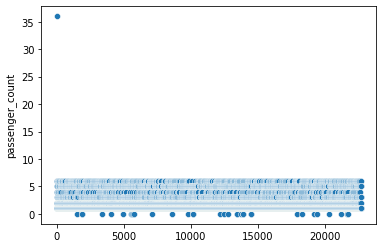

In [16]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [17]:
data = data[data['passenger_count'] <= 6]

In [18]:
data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1518,Sophia Hernandez,11/14/2017 3:45:23 PM,11/14/2017 4:26:38 PM,Debit Card,0,8.8,33.0,5.55,5.76
1876,Tommy Weaver,12/03/2017 12:05:52 PM,12/03/2017 12:13:51 PM,Cash,0,1.1,7.0,0.00,0.00
1927,Melissa Thompson,09/09/2017 3:44:45 AM,09/09/2017 3:49:19 AM,Cash,0,0.8,5.0,0.00,0.00
3354,Lisa Wilson,12/18/2017 10:44:57 PM,12/18/2017 11:00:24 PM,Cash,0,2.7,12.5,2.75,0.00
4062,Benjamin Anderson,11/27/2017 1:08:01 PM,11/27/2017 1:17:55 PM,Debit Card,0,1.7,9.0,1.95,0.00
4921,Austin Gutierrez,12/16/2017 2:59:17 PM,12/16/2017 3:21:59 PM,Debit Card,0,3.1,15.5,4.05,0.00
5565,Charles Stewart,09/04/2017 5:40:00 PM,09/04/2017 5:51:52 PM,Cash,0,1.3,9.0,1.95,0.00
5605,Kristina Smith,12/17/2017 12:18:49 PM,12/17/2017 12:40:45 PM,Cash,0,4.2,18.0,3.75,0.00
5670,Susan Cook,12/16/2017 7:50:12 PM,12/16/2017 8:00:30 PM,Cash,0,1.0,8.0,1.50,0.00
5769,Rebecca Curry,10/04/2017 3:17:52 PM,10/04/2017 3:56:26 PM,Cash,0,10.4,34.0,8.10,5.76


In [19]:
len(data[data['passenger_count'] == 0])

33

In [20]:
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

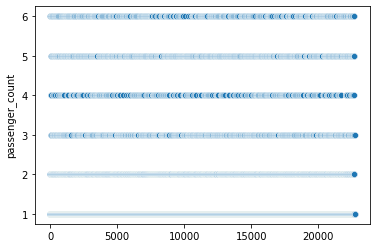

In [21]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

## 수치형 컬럼의 이상치 제거

### trip_distance의 이상치를 확인

In [22]:
data[data['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [23]:
data['trip_distance'].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

In [24]:
data.sort_values('trip_distance').iloc[150:170]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.5,0.00,0.00
3611,James Chen,11/19/2017 7:17:16 AM,11/19/2017 7:17:19 AM,Cash,1,0.01,52.0,0.00,0.00
5503,Mike Bishop,08/08/2017 11:28:54 PM,08/08/2017 11:29:00 PM,Credit Card,2,0.01,2.5,0.00,0.00
19646,Michael Solomon,12/13/2017 12:19:29 PM,12/13/2017 12:19:39 PM,Credit Card,1,0.01,52.0,17.57,5.76
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.00,0.00
325,Valerie Mullen,01/14/2017 7:04:51 PM,01/14/2017 7:05:01 PM,Cash,2,0.02,2.5,0.00,0.00
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.5,0.00,0.00
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.5,0.00,0.00
13496,Amber Boyd,01/15/2017 5:04:18 AM,01/15/2017 5:04:21 AM,Cash,1,0.02,2.5,0.00,0.00
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.5,0.00,0.00


In [25]:
data = data[data['trip_distance'] != 0]

In [26]:
data['trip_distance'].sort_values()

2987      0.01
19646     0.01
8199      0.01
5503      0.01
3611      0.01
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22515, dtype: float64

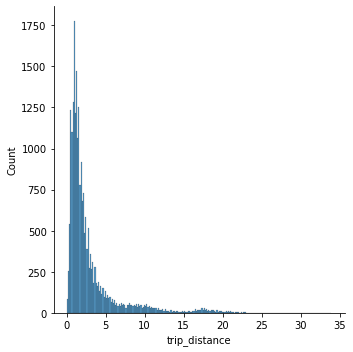

In [27]:
sns.displot(data['trip_distance'])

### fare_amount의 이상치를 확인

In [28]:
data[data['fare_amount'] < 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.0,0.0,0.0


In [29]:
len(data[data['fare_amount'] < 0])

13

In [30]:
data = data[data['fare_amount'] > 0]

In [31]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.50,0.00,0.00
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [32]:
data = data[data['fare_amount'] < 900]

In [33]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

<AxesSubplot:ylabel='fare_amount'>

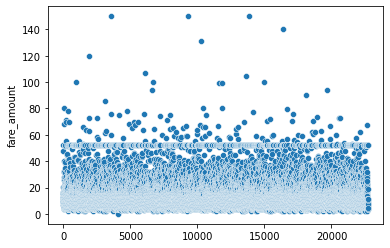

In [34]:
sns.scatterplot(x=data.index, y=data['fare_amount'])

### tip_amount의 이상치를 확인

<AxesSubplot:ylabel='tip_amount'>

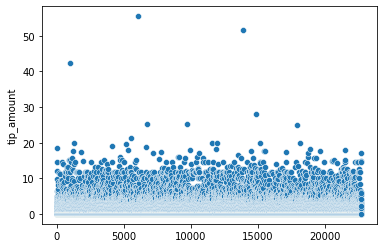

In [35]:
sns.scatterplot(x=data.index, y=data['tip_amount'])

In [36]:
data[data['tip_amount'] > 40]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.0,42.29,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.0,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.0,51.64,5.76


In [37]:
data = data[data['tip_amount'] < 40]

<AxesSubplot:ylabel='tip_amount'>

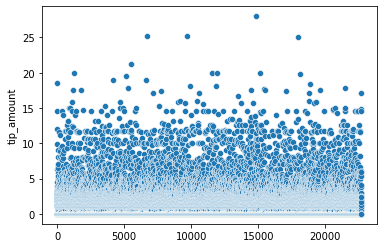

In [38]:
sns.scatterplot(x=data.index, y=data['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

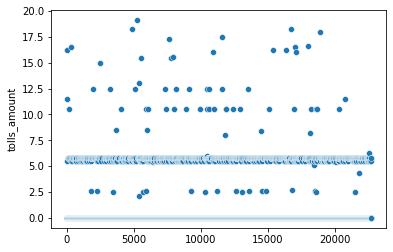

In [39]:
sns.scatterplot(x=data.index, y=data['tolls_amount'])

## 범주형 데이터 전처리

### 결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.

In [40]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [41]:
data['payment_method'].nunique()

3

In [42]:
data['payment_method'].value_counts()

Cash           11094
Debit Card      5729
Credit Card     5672
Name: payment_method, dtype: int64

In [43]:
data['payment_method'] = data['payment_method'].replace({'Debit Card':'Card', 'Credit Card':'Card'})

In [44]:
data['payment_method'].value_counts()

Card    11401
Cash    11094
Name: payment_method, dtype: int64

### 승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.

In [45]:
data['passenger_first_name'] = data['passenger_name'].str.split(expand=True)[0]

In [46]:
data['passenger_first_name']

0          Pamela
1        Michelle
2            Tina
3         Anthony
4         Brianna
           ...   
22696      Austin
22697     Monique
22698        Drew
22699    Jonathan
22700    Benjamin
Name: passenger_first_name, Length: 22495, dtype: object

### 택시 탑승, 하차 시간을 활용해봅시다.

In [47]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [48]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
 9   passenger_first_name   22495 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [50]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [51]:
data['travel_time'] = data['travel_time'].dt.seconds

In [52]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003


## 보너스 (feature engineering 맛보기)

### 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다

In [53]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

###  fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

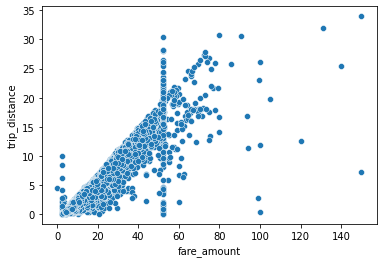

In [54]:
sns.scatterplot(x=data['fare_amount'], y=data['trip_distance'])

### fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현

<AxesSubplot:xlabel='fare_amount', ylabel='travel_time'>

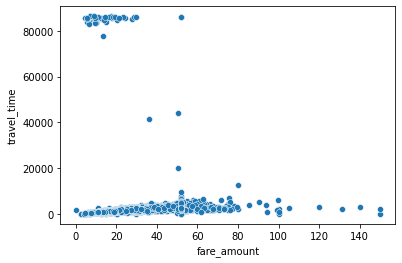

In [55]:
sns.scatterplot(x=data['fare_amount'], y=data['travel_time'])

### trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

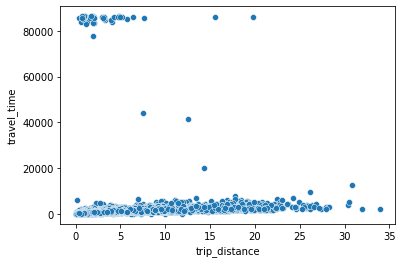

In [56]:
sns.scatterplot(x=data['trip_distance'], y=data['travel_time'])

### scatter plot으로 관찰된 travel_time의 이상치를 제거

In [57]:
data = data[data['travel_time'] < 60000]

In [58]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003,16.50
